## 作者：大数据20黄德攒
## 环境：Anaconda python3.9.12
## IDE：VScode

In [1]:
#导入相关库
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [2]:
#数据
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split    #切分数据集，训练集和测试集


In [5]:
#导入CSV数据（关于蘑菇的各项特征数据表）
import csv
import pandas as pd


data = pd.read_csv(".\data\mushrooms.csv")
data.head(6)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [7]:
wine=load_wine()
print(type(wine))   #--------------<class 'sklearn.utils.Bunch'>
wine


<class 'sklearn.utils.Bunch'>


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [8]:
data.isnull().sum()#缺失值

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
data['class'].unique()      #p有毒    e无毒   
#unique的作用是从输入序列中“删除”所有相邻的重复元素


array(['p', 'e'], dtype=object)

In [10]:
data.dtypes


class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head()#-----------<class 'pandas.core.frame.DataFrame'>


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [12]:
X = data.iloc[:,1:23]  # 所有行、所有功能和无标签
y = data.iloc[:,0]  # 所有行，仅标签
X.head()
y.head()


0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [13]:
#将数据剪切成训练和测试数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape
# X_test.shape


(6499, 22)

In [14]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
score


1.0

In [15]:
clf.feature_importances_   #


array([0.        , 0.        , 0.        , 0.        , 0.02397249,
       0.        , 0.        , 0.14621746, 0.26817376, 0.02716279,
       0.09930023, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.38651374,
       0.02185554, 0.026804  ])

In [16]:
data.dtypes
print(type(data.dtypes))


<class 'pandas.core.series.Series'>


In [17]:
# data.dtypes
feature_name=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape'
              ,'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type'
              ,'veil-color','ring-number','ring-type','spore-print-color','population','habitat']


In [18]:
print(len(feature_name))
# feature_name=[]
# for i in range(len(data.dtypes)):
#     feature_name.append()


22


In [19]:
[*zip(feature_name,clf.feature_importances_)]


[('cap-shape', 0.0),
 ('cap-surface', 0.0),
 ('cap-color', 0.0),
 ('bruises', 0.0),
 ('odor', 0.023972489775133166),
 ('gill-attachment', 0.0),
 ('gill-spacing', 0.0),
 ('gill-size', 0.14621745754606932),
 ('gill-color', 0.2681737587145311),
 ('stalk-shape', 0.027162786951459204),
 ('stalk-root', 0.09930023122224009),
 ('stalk-surface-above-ring', 0.0),
 ('stalk-surface-below-ring', 0.0),
 ('stalk-color-above-ring', 0.0),
 ('stalk-color-below-ring', 0.0),
 ('veil-type', 0.0),
 ('veil-color', 0.0),
 ('ring-number', 0.0),
 ('ring-type', 0.0),
 ('spore-print-color', 0.3865137366924967),
 ('population', 0.02185554229856966),
 ('habitat', 0.026803996799500723)]

In [20]:
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=30)
clf=clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)

score


1.0

In [21]:
clf=tree.DecisionTreeClassifier(criterion='entropy'      #优化!
                                ,random_state=30
                                ,splitter='random')
clf=clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
score


1.0

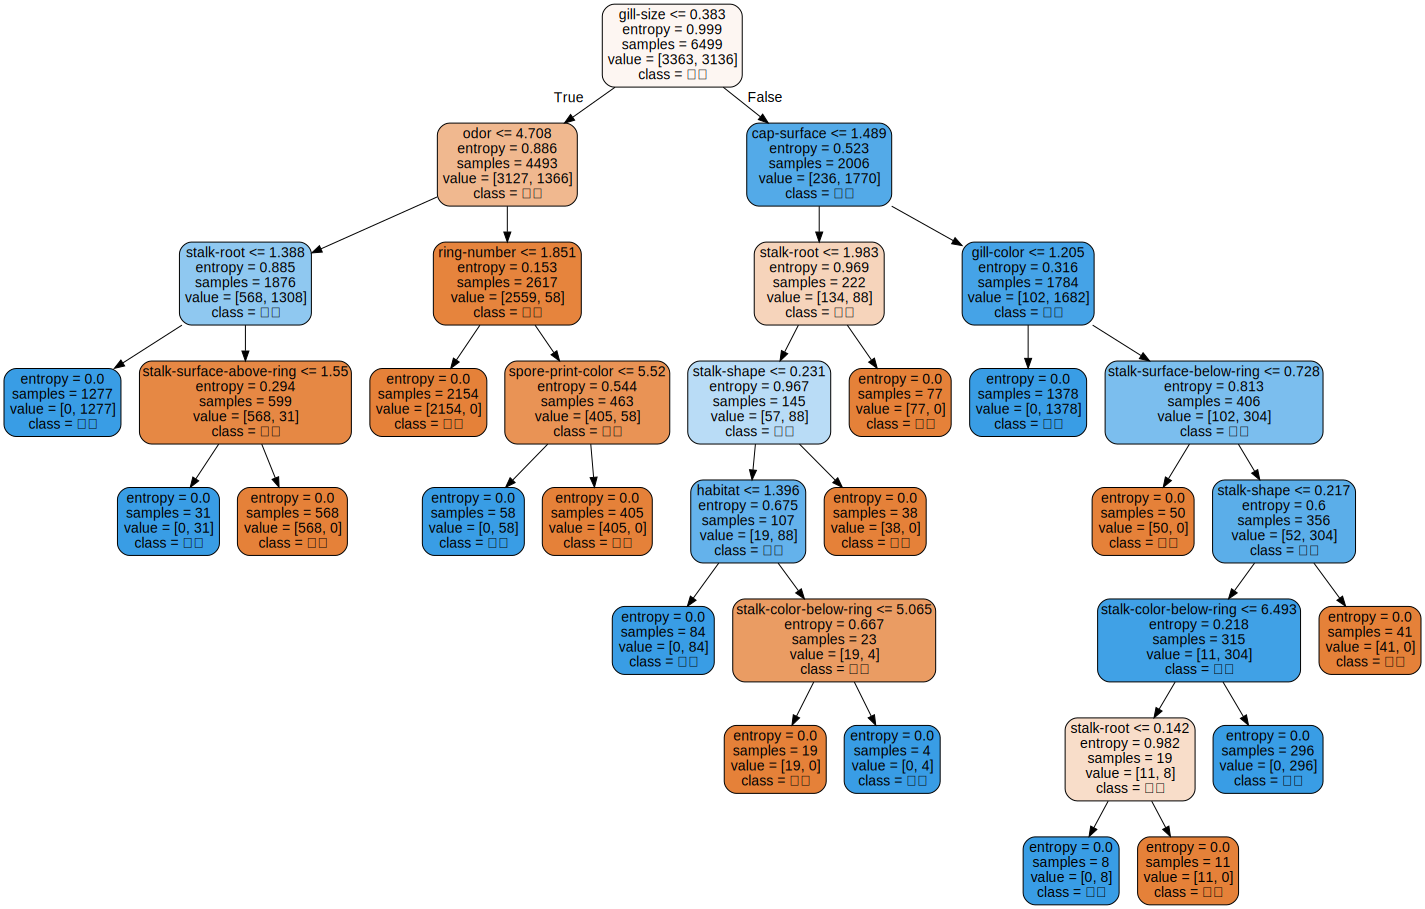

In [26]:
import graphviz
dot_data=tree.export_graphviz(clf
                             ,feature_names=feature_name
                             ,class_names=['有毒','无毒']
                             ,filled=True
                             ,rounded=True)
graph=graphviz.Source(dot_data)

graph.save()
graph
